### Importing the Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import sys, os
import warnings
warnings.filterwarnings('ignore')

### Setting the Path For the Scripts

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [3]:
import preprocessing as psr
from rfms_visualization import visualize_rfms, classify_rfms, visualize_label_counts
from woe_iv_calculator import woe_iv
from bin_feature import bin_feature

### Loading the Datatset

In [4]:
filepath = r'C:\Users\Blen\OneDrive\Desktop\10Academy\CreditScoreModeling\data\aggregated_data.csv'

In [5]:
data = psr.load_data(filepath)

2024-10-07 20:38:42,496 - INFO - Loading the dataset....


In [6]:
psr.missing_values_table(data)

2024-10-07 20:38:42,547 - INFO - Displaying Missing Value Percentages for Each Column....


The dataframe has 15columns.
There are 1 columns that have missing values.



,Missing Values,% of Total Values,DType
transaction_std,812,22.4,float64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AccountId                   3633 non-null   object 
 1   total_transaction_amount    3633 non-null   float64
 2   average_transaction_amount  3633 non-null   float64
 3   transaction_count           3633 non-null   int64  
 4   transaction_std             2821 non-null   float64
 5   recency                     3633 non-null   int64  
 6   frequency                   3633 non-null   int64  
 7   monetary                    3633 non-null   float64
 8   recency_score               3633 non-null   int64  
 9   frequency_score             3633 non-null   int64  
 10  monetary_score              3633 non-null   int64  
 11  RFM_Score                   3633 non-null   int64  
 12  credit_debit_ratio          3633 non-null   float64
 13  max_transaction_amount      3633 

### Visualize RFMS Space

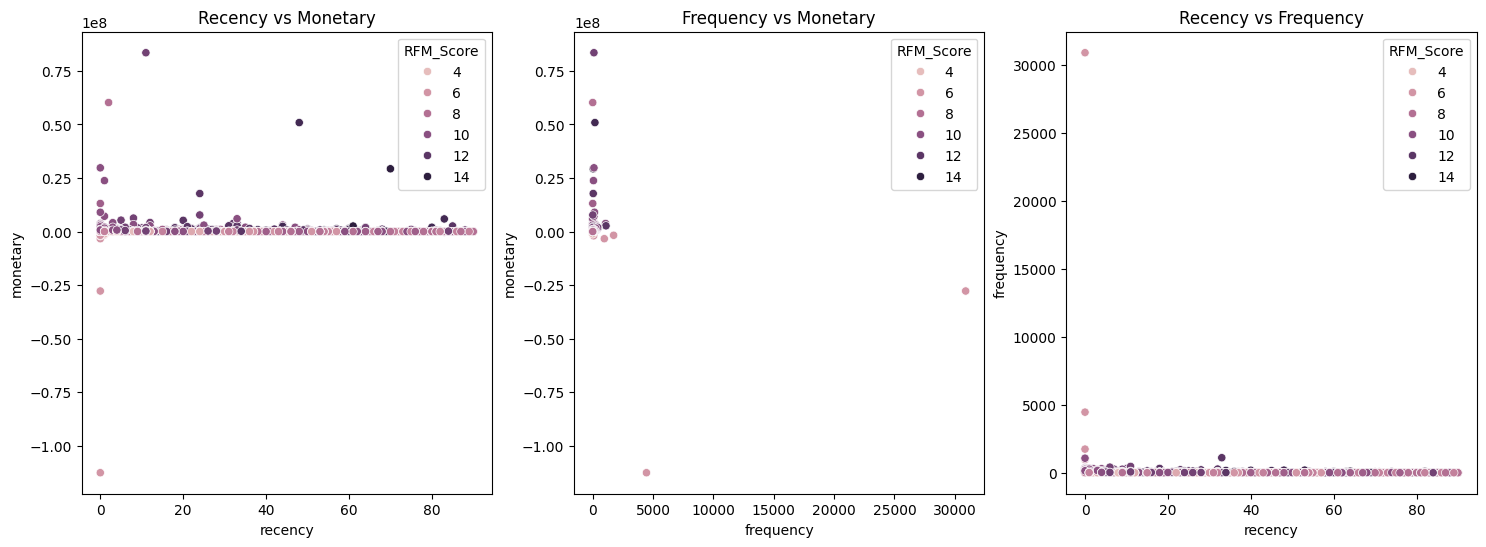

In [8]:
visualize_rfms(data)

### Classify Users

In [9]:
data = classify_rfms(data, threshold=7)

### Visualizing label counts

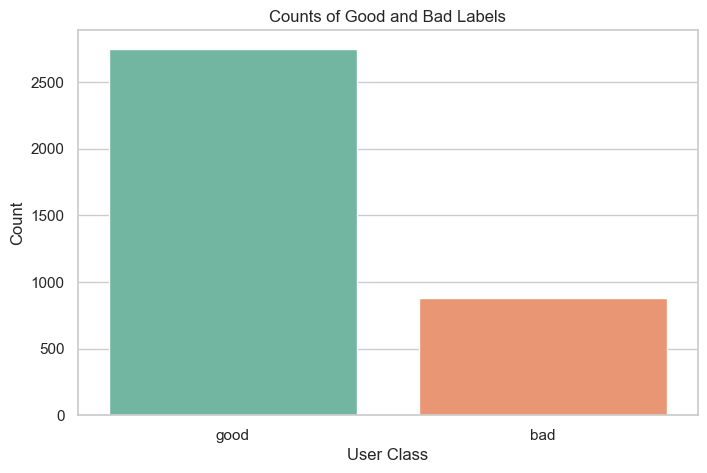

In [10]:
visualize_label_counts(data)

### Perform WoE and IV Binning for Each Feature

In [11]:
features = ['total_transaction_amount', 'average_transaction_amount', 'transaction_count',
            'transaction_std', 'recency', 'frequency', 'monetary', 'subscription_count']

In [12]:
iv_values = {}
for feature in features:
    woe_table, iv = woe_iv(data, feature, 'user_class', bins=10)
    print(f"WoE for {feature}:\n", woe_table)
    print(f"IV for {feature}: {iv:.4f}")
    iv_values[feature] = iv

total      int64
good     float64
dtype: object
WoE for total_transaction_amount:
                           total  good    bad  WoE  IV
bin                                                  
(-112561886.001, 1000.0]    429   0.0  429.0  NaN NaN
(1000.0, 4000.0]            340   0.0  340.0  NaN NaN
(4000.0, 10000.0]           426   0.0  426.0  NaN NaN
(10000.0, 20000.0]          308   0.0  308.0  NaN NaN
(20000.0, 26000.0]          314   0.0  314.0  NaN NaN
(26000.0, 46000.0]          379   0.0  379.0  NaN NaN
(46000.0, 75080.0]          347   0.0  347.0  NaN NaN
(75080.0, 121000.0]         366   0.0  366.0  NaN NaN
(121000.0, 265800.0]        360   0.0  360.0  NaN NaN
(265800.0, 83466000.0]      364   0.0  364.0  NaN NaN
IV for total_transaction_amount: 0.0000
total      int64
good     float64
dtype: object
WoE for average_transaction_amount:
                                total  good    bad  WoE  IV
bin                                                       
(-157142.85799999998, 1000

In [15]:
data.head()

,AccountId,total_transaction_amount,average_transaction_amount,transaction_count,transaction_std,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_Score,credit_debit_ratio,max_transaction_amount,subscription_count,user_class,bin
0,AccountId_1,70000.0,2.333333e+04,3,5773.502692,34,3,70000.0,4,1,4,9,0.000000e+00,30000.0,1,0.0,NaN
1,AccountId_10,-3330347.0,-3.451137e+03,965,3567.343270,0,965,-3330347.0,1,4,1,6,3.330347e+15,-300.0,1,0.0,NaN
2,AccountId_100,180000.0,9.000000e+04,2,14142.135624,37,2,180000.0,4,1,5,10,0.000000e+00,100000.0,1,0.0,NaN
3,AccountId_1000,97000.0,9.700000e+03,10,16686.987612,79,10,97000.0,5,3,4,12,0.000000e+00,50000.0,1,0.0,NaN
4,AccountId_1002,2000000.0,2.000000e+06,1,NaN,21,1,2000000.0,3,1,5,9,0.000000e+00,2000000.0,1,0.0,NaN
